<a href="https://colab.research.google.com/github/shahchayan9/CRISP-DM-SEMMA-AND-KDD/blob/main/Semma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/superstore_data.csv'
superstore_data = pd.read_csv(file_path)

# Display the first few rows and structure of the dataset
superstore_data.info(), superstore_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(None,
       Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
 0   1826        1970  Graduation       Divorced  84835.0        0         0   
 1      1        1961  Graduation         Single  57091.0        0         0   
 2  10476        1958  Graduation        Married  67267.0        0         1   
 3   1386        1967  Graduation       Together  32474.0        1         1   
 4   5371        1989  Graduation         Single  21474.0        1         0   
 
   Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
 0   6/16/2014        0       189  ...              111               189   
 1   6/15/2014        0       464  ...                7                 0   
 2   5/13/2014        0       134  ...               15                 2   
 3   11/5/2014        0        10  ...                0                 0   
 4    8/4/2014        0         6  ...               11                 0   
 
    MntGoldProds  NumDealsPurchases  NumWebPurc

In [ ]:
# Taking a 20% random sample of the dataset
sampled_data = superstore_data.sample(frac=0.2, random_state=42)

# Checking the size of the sampled dataset
sampled_data.shape


(448, 22)

Text(0.5, 1.0, 'Number of Web Visits per Month')

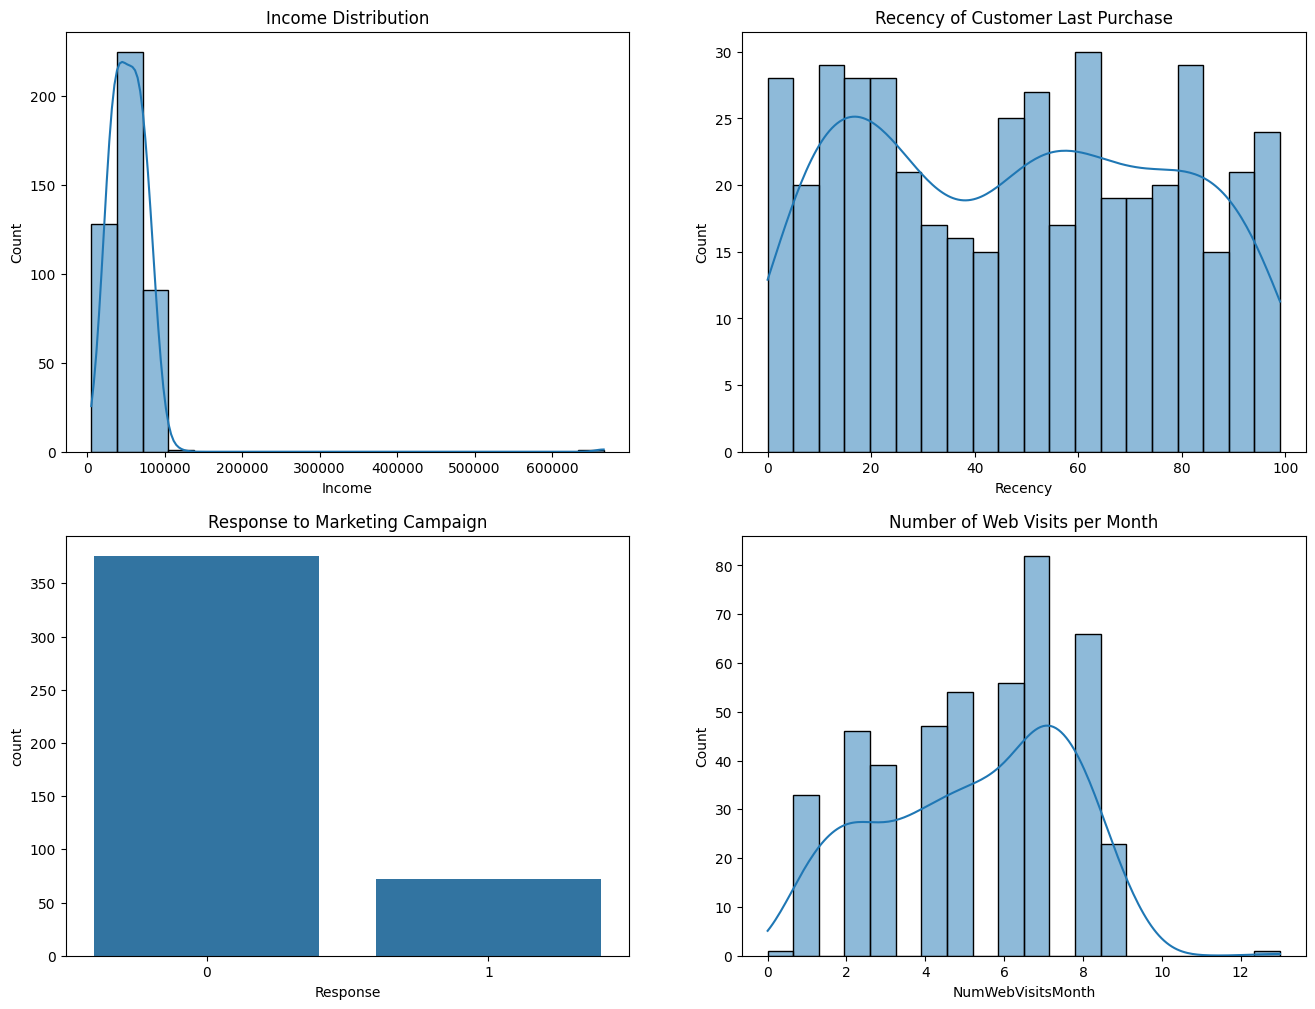

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.figure(figsize=(16, 12))

# Histogram for Income
plt.subplot(2, 2, 1)
sns.histplot(sampled_data['Income'].dropna(), kde=True, bins=20)
plt.title('Income Distribution')

# Histogram for Recency
plt.subplot(2, 2, 2)
sns.histplot(sampled_data['Recency'], kde=True, bins=20)
plt.title('Recency of Customer Last Purchase')

# Histogram for Response (Target variable)
plt.subplot(2, 2, 3)
sns.countplot(x='Response', data=sampled_data)
plt.title('Response to Marketing Campaign')

# Histogram for NumWebVisitsMonth
plt.subplot(2, 2, 4)
sns.histplot(sampled_data['NumWebVisitsMonth'], kde=True, bins=20)
plt.title('Number of Web Visits per Month')


In [ ]:
# Imputing missing 'Income' values with the median
sampled_data['Income'].fillna(sampled_data['Income'].median(), inplace=True)

# Standardizing numerical columns
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

scaler = StandardScaler()
sampled_data[numerical_columns] = scaler.fit_transform(sampled_data[numerical_columns])

# Verifying the modifications
sampled_data[numerical_columns].describe()


<ipython-input-5-e20ea9f82e3e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sampled_data['Income'].fillna(sampled_data['Income'].median(), inplace=True)


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02,4.480000e+02
mean,-8.723181e-17,-3.370320e-17,-7.533656e-17,2.775558e-17,-2.775558e-17,-5.551115e-17,-5.551115e-17,2.973812e-17,5.749369e-17,3.172066e-17,1.586033e-17,1.348128e-16,1.308477e-16
std,1.001118e+00,1.001118e+00,1.001118e+00,1.001118e+00,1.001118e+00,1.001118e+00,1.001118e+00,1.001118e+00,1.001118e+00,1.001118e+00,1.001118e+00,1.001118e+00,1.001118e+00
min,-1.381894e+00,-1.634354e+00,-9.325785e-01,-6.912151e-01,-7.896382e-01,-7.340908e-01,-6.642522e-01,-8.804403e-01,-1.263426e+00,-1.501415e+00,-9.814124e-01,-1.857019e+00,-2.206616e+00
25%,-5.055521e-01,-9.204198e-01,-8.458841e-01,-6.397887e-01,-7.161558e-01,-6.702320e-01,-6.397898e-01,-6.888636e-01,-7.068727e-01,-7.797046e-01,-6.056237e-01,-9.109108e-01,-9.489009e-01
50%,-4.633014e-02,3.149264e-02,-3.361810e-01,-4.083696e-01,-4.428933e-01,-4.573694e-01,-4.563219e-01,-3.823409e-01,-1.503191e-01,-5.799455e-02,-2.298350e-01,-2.801719e-01,3.088139e-01
75%,4.256821e-01,8.474176e-01,5.681311e-01,2.087478e-01,3.562275e-01,2.503986e-01,1.919315e-01,3.169140e-01,4.062344e-01,6.637155e-01,5.217423e-01,6.659363e-01,7.280522e-01
max,1.731207e+01,1.731336e+00,3.509761e+00,4.297151e+00,3.619304e+00,4.310752e+00,5.744894e+00,3.889819e+00,5.971770e+00,8.241671e+00,3.152263e+00,2.242783e+00,3.243482e+00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Defining the features (X) and target (y)
X = sampled_data[numerical_columns]
y = sampled_data['Response']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Generating a classification report
classification_report_str = classification_report(y_test, y_pred)
classification_report_str


'              precision    recall  f1-score   support\n\n           0       0.91      0.92      0.91        75\n           1       0.57      0.53      0.55        15\n\n    accuracy                           0.86        90\n   macro avg       0.74      0.73      0.73        90\nweighted avg       0.85      0.86      0.85        90\n'

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


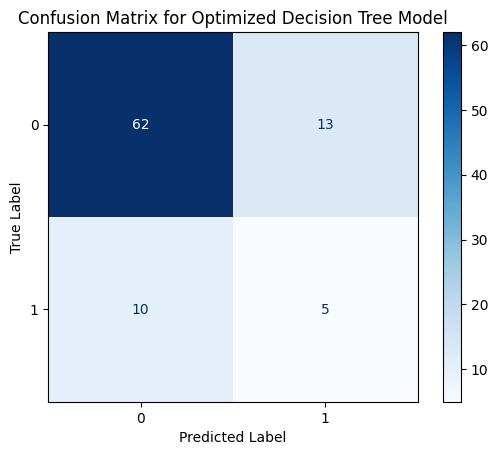

In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Defining a set of hyperparameters for Grid Search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Setting up the Grid Search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Best parameters from Grid Search
best_params = grid_search.best_params_

# Rebuilding the model with the best parameters
optimized_model = DecisionTreeClassifier(**best_params, random_state=42)
optimized_model.fit(X_resampled, y_resampled)

# Predicting on the test set with the optimized model
y_optimized_pred = optimized_model.predict(X_test)

# Evaluating the optimized model
optimized_accuracy = accuracy_score(y_test, y_optimized_pred)
classification_report_optimized = classification_report(y_test, y_optimized_pred)

best_params, optimized_accuracy, classification_report_optimized

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix for the optimized model
cm = confusion_matrix(y_test, y_optimized_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
disp.ax_.set_title('Confusion Matrix for Optimized Decision Tree Model')
disp.ax_.set_xlabel('Predicted Label')
disp.ax_.set_ylabel('True Label')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.92      0.91        75
           1       0.57      0.53      0.55        15

    accuracy                           0.86        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.85      0.86      0.85        90

